In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate

In [2]:
def get_nonzero_startpoint6_10(region, path):
    files = os.listdir(path+region)
    files = [file for file in files if "_06_" in file or "_07_" in file or "_08_" in file or "_09_" in file or "_10_" in file]
    start_points=[]
    for file in files:
        death_sim=np.load(path+region+'\\'+file)["arr_0"]
        sim_md = np.median(death_sim, axis=0)
        for i in range(0, len(sim_md)):
            if sim_md[i]>0:
                start_points.append(i)
                break
    return max(start_points)

In [3]:
def avg_wmape(region, confile, start_yw, end_yw, start_point, path):
    df=pd.read_csv("../data/regions/" + region + "/epidemic/deaths.csv")
    death_real=df.loc[(df["year_week"] >= start_yw) & \
                                             (df["year_week"] <= end_yw)]["deaths"].values
    death_real=death_real[start_point:]
    death_sim=np.load(path+"\\"+confile)["arr_0"]
    md_sim=np.median(death_sim, axis=0)
    md_sim=md_sim[start_point:]
    error = np.sum(np.abs(death_real - md_sim)) / np.sum(np.abs(death_real))
    return error

In [4]:
def mape(region, confile, start_yw, end_yw, start_point, path):
    df=pd.read_csv("../data/regions/" + region + "/epidemic/deaths.csv")
    death_real=df.loc[(df["year_week"] >= start_yw) & \
                                             (df["year_week"] <= end_yw)]["deaths"].values
    death_real=death_real[start_point:]
    death_sim=np.load(path+"\\"+confile)["arr_0"]
    #death_sim=np.load(f"{path}\{confile}")["arr_0"]
    md_sim=np.median(death_sim, axis=0)
    md_sim=md_sim[start_point:]
    error=0
    for i in range(len(death_real)):
        error += np.sum(np.abs(death_real[i] - md_sim[i]) /np.abs(death_real[i]))
    return error

In [5]:
def AIC(region, k, confile, start_yw, end_yw, start_point, path):
    k=k+2
    df=pd.read_csv("../data/regions/" + region + "/epidemic/deaths.csv")
    death_real=df.loc[(df["year_week"] >= start_yw) & \
                                             (df["year_week"] <= end_yw)]["deaths"].values
    death_real=death_real[start_point:]
    n=len(death_real)
    death_sim=np.load(path+"\\"+confile)["arr_0"][start_point:]
    md_sim=np.median(death_sim, axis=0)
    ssr=0
    for j in range(n):
        ssr=ssr+(md_sim[j]-death_real[j])*(md_sim[j]-death_real[j])
    ssr=ssr/n
    return 2*k+n*np.log(ssr)

In [6]:
import os
def get_6_10_aic_new(region, start_yw, end_yw, path):
    aics=[]
    wmapes=[]
    mapes=[]
    start_point = get_nonzero_startpoint6_10(region, path)
    all_files  = os.listdir(path+region)
    files  = [i for i in all_files if ("_06_" in i) or ("_07_" in i) or ("_08_" in i) or ("_09_" in i) or ("_10_" in i)]
    for i in files:
        if "_06_" in i:
            if "London" in i:
                aics.append(AIC(region, 5, i, start_yw, end_yw, start_point, path+region))
                wmapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
                mapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
            elif "Lombardy" in i or "British Columbia" in i:
                aics.append(AIC(region, 6, i, start_yw, end_yw, start_point, path+region))
                wmapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
                mapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
            elif "Sao Paulo" in i: 
                aics.append(AIC(region, 7, i, start_yw, end_yw, start_point, path+region))
                wmapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
                mapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
        else:
            if "London" in i:
                aics.append(AIC(region, 8, i, start_yw, end_yw, start_point, path+region))
                wmapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
                mapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
            elif "Lombardy" in i or "British Columbia" in i:
                aics.append(AIC(region, 9, i, start_yw, end_yw, start_point, path+region))
                wmapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
                mapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
            elif "Sao Paulo" in i: 
                aics.append(AIC(region, 10, i, start_yw, end_yw, start_point, path+region))
                wmapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
                mapes.append(avg_wmape(region, i, start_yw, end_yw, start_point, path+region))
    return aics, mapes

In [7]:
import math
def AIC_weight(aics_list):
    smallest=min(aics_list)
    s=0
    for i in range(len(aics_list)):
        s+=math.exp(-(aics_list[i]-smallest)/2)
    ws=[]
    for i in range(len(aics_list)):
        ws.append(math.exp(-(aics_list[i]-smallest)/2)/s)
    return ws

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


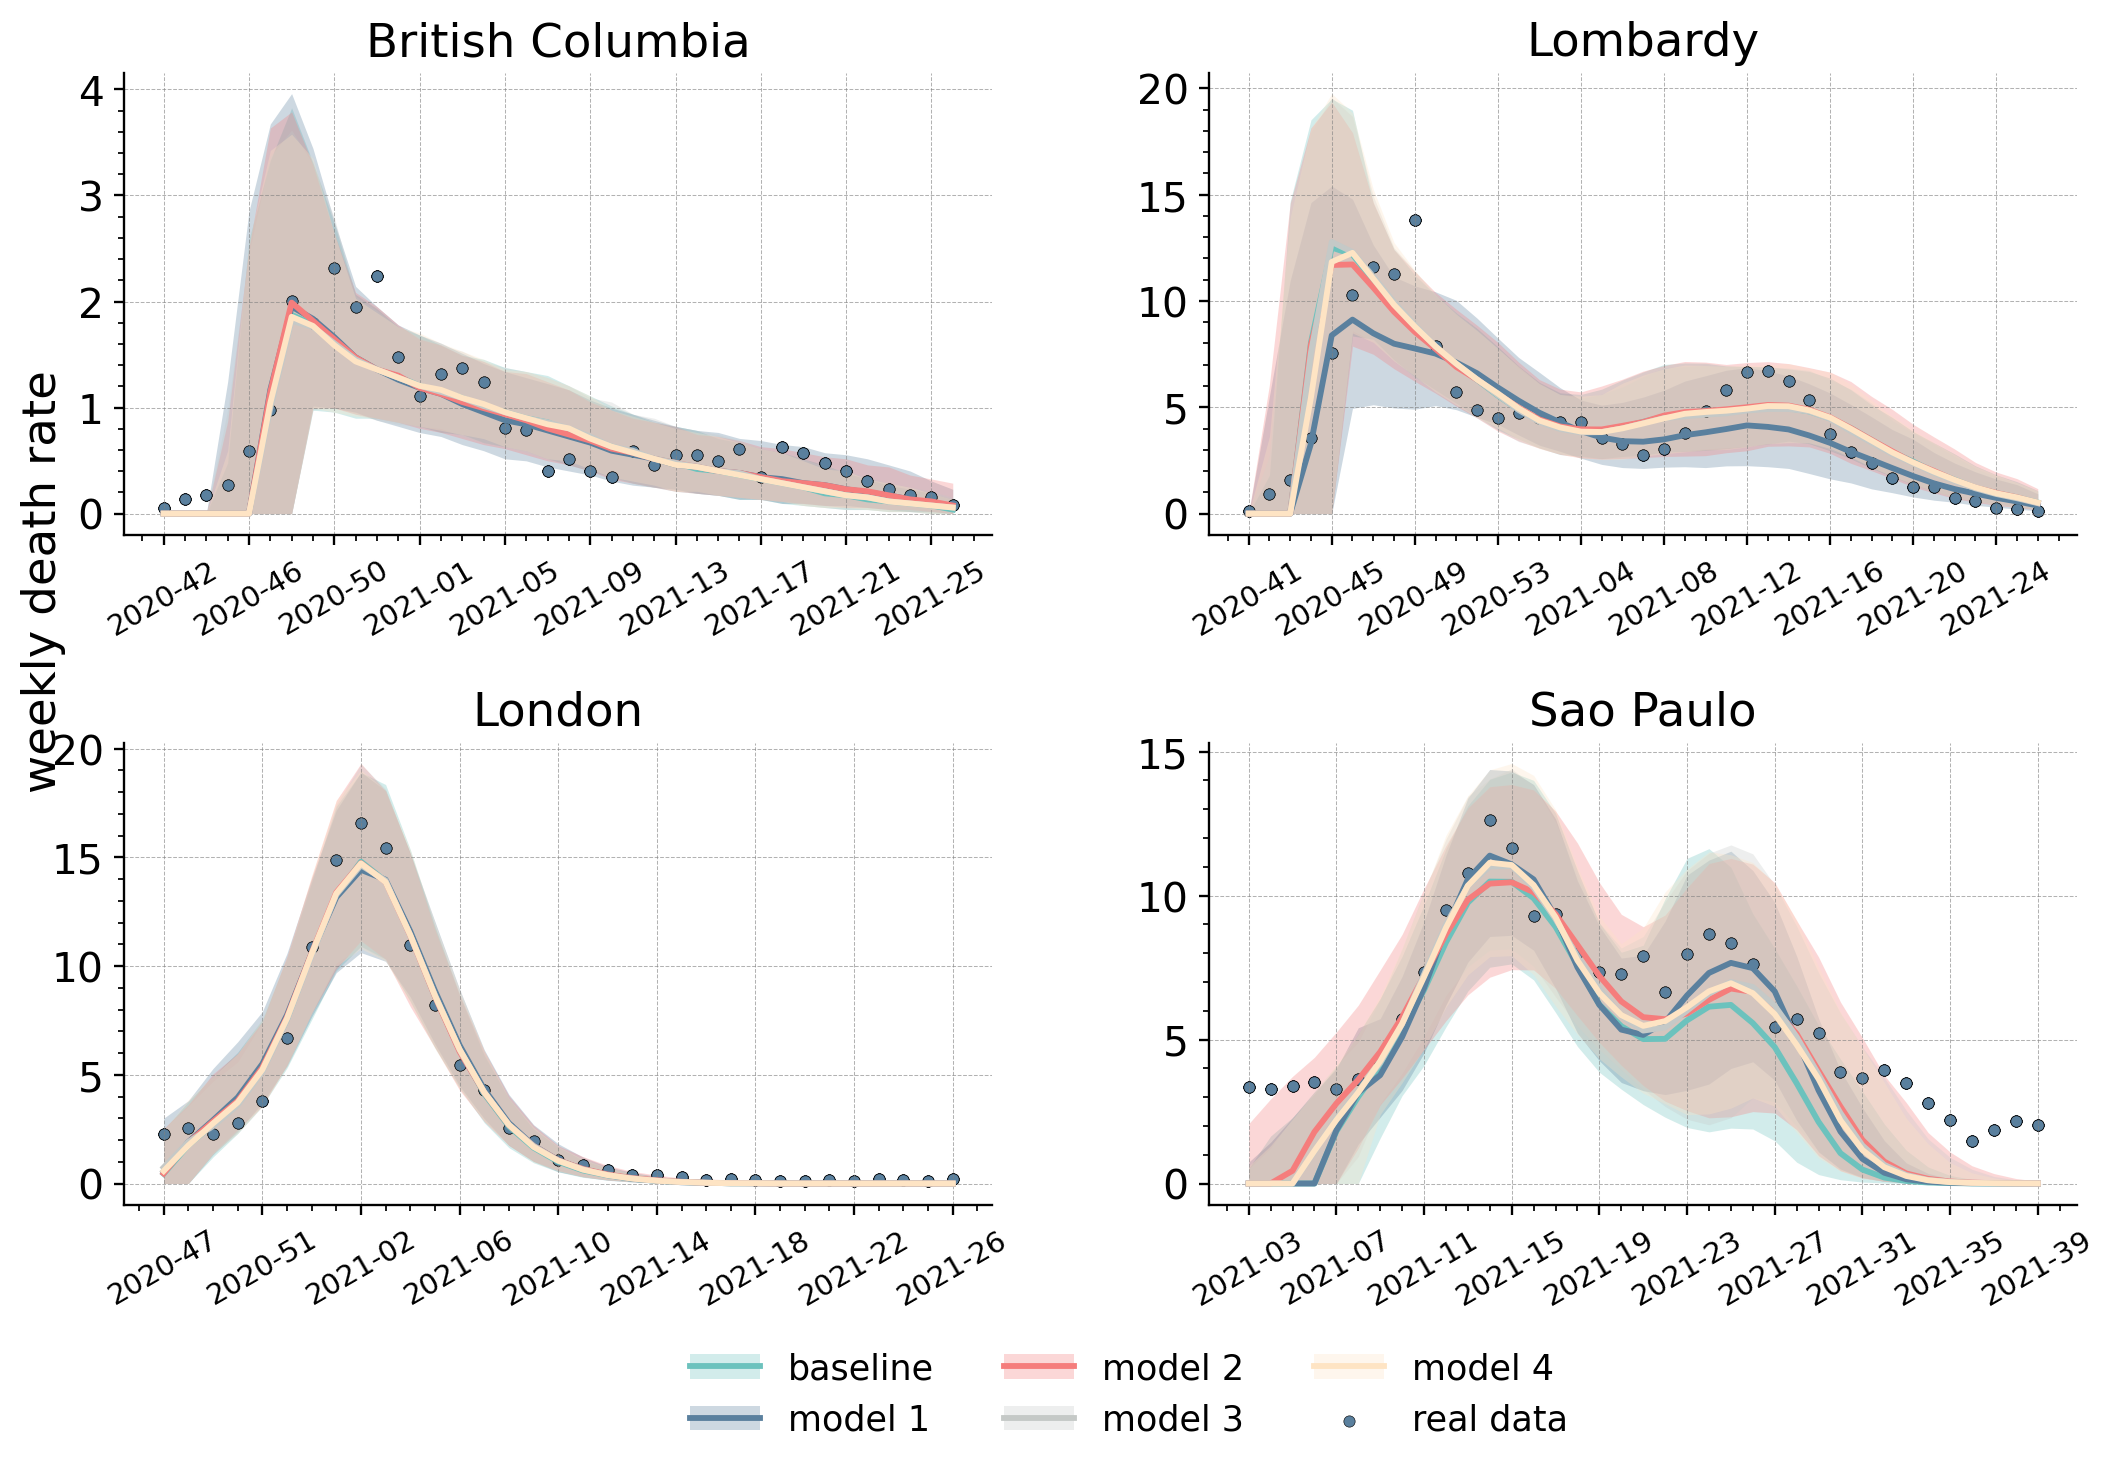

In [9]:
ncomp = 12
nage  = 16

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=210, figsize=(12,7))
i, j = 0, 0

for region in ["British Columbia", "Lombardy", "London", "Sao Paulo"]:
    
    df=pd.read_csv("../data/regions/" + region + "/epidemic/deaths.csv")

    if region=="British Columbia":
        start_yw, end_yw = "2020-42", "2021-26"
    elif region=="Lombardy":
        start_yw, end_yw = "2020-41", "2021-26"
    if region=="London":
        start_yw, end_yw = "2020-47", "2021-26"
    if region=="Sao Paulo":
        start_yw, end_yw = "2021-03", "2021-39"
    
    death_real=df.loc[(df["year_week"] >= start_yw) & \
                                         (df["year_week"] <= end_yw)]["deaths"].values
    real_date=df.loc[(df["year_week"] >= start_yw) & \
                                         (df["year_week"] <= end_yw)]["year_week"].values

    colors = ['#6CC2BD', '#5A809E', '#F57D7C', '#c5c9c7', '#FEE4C4', \
      '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
    axes[i, j].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
    axes[i, j].spines['top'].set_visible(False)
    axes[i, j].spines['right'].set_visible(False)
    axes[i, j].minorticks_on()  
    
    path="..\\posteriors\\"
    files  = os.listdir(path)
    confile_list  = [i for i in files if (region in i) and ('.npz' in i)]
    confile_list  = [i for i in confile_list if ("_06_" in i) or ("_07_" in i) or ("_08_" in i) or ("_09_" in i) or ("_10_" in i)]

    #calculate deaths per 10,000 persons
    pop=pd.read_excel(f'../data/regions/{region}/demographic/pop_5years.xlsx')
    pop_total=pop['total'].sum()
    death_real = death_real/pop_total*100000

    
    p3=[0,0,0,0,0]
    p2=[0,0,0,0,0]
    p1=[0,0,0,0,0]

    # death_real=death_real[start:]
    # real_date=real_date[start:]
    for m in range(len(confile_list)):
        
        death_sim=np.load(path+"\\"+ confile_list[m])["arr_0"]
        death_sim = death_sim/pop_total*100000
        
        p1[m], = axes[i, j].plot(real_date, np.median(death_sim, axis=0), color=colors[m], alpha=1,linewidth=2)
        
        p2[m] = axes[i, j].fill_between(real_date, np.quantile(death_sim, axis=0, q=0.05), 
                             np.quantile(death_sim, axis=0, q=0.95), color=colors[m], alpha=0.3, linewidth=0)#6CC2BD
        p3[m] = axes[i, j].scatter(real_date,death_real,color="#5A809E", edgecolor="black",s=15,linewidth=0.2)
        
        

    array_index=[]
    for d in range(len(real_date)):
        if d%4==0:
            array_index.append(d)
    axes[i, j].set_xticks(array_index)
    labels = [real_date[d] for d in array_index]
    axes[i, j].set_xticklabels(labels, rotation=30)
    axes[i, j].tick_params(axis="y", labelsize=14)
    axes[i, j].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
    axes[i, j].legend(frameon=False)
    axes[i, j].set_title(region, fontsize=16)
    
    j += 1
    
    if j==2:
        j = 0
        i += 1
plt.subplots_adjust(hspace=0.45, wspace=0.25)

axes[1, 0].legend([(p1[0], p2[0]), (p1[1], p2[1]), (p1[2],p2[2]), (p1[3], p2[3]), (p1[4], p2[4]), p3[0]], 
                  ["baseline" , "model 1", "model 2", "model 3", "model 4", "real data"],bbox_to_anchor=[0.7, -1.25,1,1], frameon=False, ncol=3, fontsize=12)
axes[0, 0].set_ylabel("weekly death rate",fontsize=16, y=-0.1)
plt.savefig("./figures/comparison.pdf", bbox_inches="tight")
plt.show()

In [11]:
bc_aics6_10, bc_mapes6_10 = get_6_10_aic_new("British Columbia", '2020-42', '2021-26', "..\\posteriors\\")
lom_aics6_10, lom_mapes6_10 = get_6_10_aic_new("Lombardy", '2020-41', '2021-26', "..\\posteriors\\")
london_aics6_10, london_mapes6_10 = get_6_10_aic_new("London", '2020-47', '2021-26', "..\\posteriors\\")
sp_aics6_10, sp_mapes6_10 = get_6_10_aic_new("Sao Paulo", '2021-03', '2021-39', "..\\posteriors\\")

In [12]:
# wmapes
title=['', 'baseline', 'model 1', 'model 2', 'model 3', 'model 4']
ls1=['British Columbia']
ls1.extend([round(i, 3) for i in bc_mapes6_10])
ls2=['Lombardy']
ls2.extend([round(i, 3) for i in lom_mapes6_10])
ls3=['London']
ls3.extend([round(i, 3) for i in london_mapes6_10])      
ls4=['Sao Paulo']
ls4.extend([round(i, 3) for i in sp_mapes6_10])
table = [title, ls1, ls2, ls3, ls4]

print(tabulate(table, tablefmt="latex"))

\begin{tabular}{llllll}
\hline
                  & baseline & model 1 & model 2 & model 3 & model 4 \\
 British Columbia & 0.259    & 0.235   & 0.234   & 0.258   & 0.258   \\
 Lombardy         & 0.266    & 0.227   & 0.26    & 0.259   & 0.243   \\
 London           & 0.13     & 0.142   & 0.127   & 0.125   & 0.142   \\
 Sao Paulo        & 0.29     & 0.232   & 0.213   & 0.217   & 0.221   \\
\hline
\end{tabular}


In [13]:
# AIC scores
title=['', 'baseline', 'model 1', 'model 2', 'model 3', 'model 4']
ls1=['British Columbia']
ls1.extend([round(i, 1) for i in bc_aics6_10])
ls2=['Lombardy']
ls2.extend([round(i, 1) for i in lom_aics6_10])
ls3=['London']
ls3.extend([round(i, 1) for i in london_aics6_10])      
ls4=['Sao Paulo']
ls4.extend([round(i, 1) for i in sp_aics6_10])
table = [title, ls1, ls2, ls3, ls4]

print(tabulate(table, tablefmt="latex"))

\begin{tabular}{llllll}
\hline
                  & baseline & model 1 & model 2 & model 3 & model 4 \\
 British Columbia & 263.7    & 269.1   & 269.5   & 269.9   & 269.9   \\
 Lombardy         & 425.4    & 436.7   & 431.1   & 432.3   & 434.4   \\
 London           & 331.6    & 338.8   & 336.5   & 337.9   & 338.7   \\
 Sao Paulo        & 501.9    & 511.3   & 501.2   & 506.0   & 505.8   \\
\hline
\end{tabular}


In [14]:
# AIC weights
title=['', 'baseline', 'model 1', 'model 2', 'model 3', 'model 4']
ls1=['British Columbia']
ls1.extend([round(i, 2) for i in AIC_weight(bc_aics6_10)])
ls2=['Lombardy']
ls2.extend([round(i, 2) for i in AIC_weight(lom_aics6_10)])
ls3=['London']
ls3.extend([round(i, 2) for i in AIC_weight(london_aics6_10)])      
ls4=['Sao Paulo']
ls4.extend([round(i, 2) for i in AIC_weight(sp_aics6_10)])
table = [title, ls1, ls2, ls3, ls4]

print(tabulate(table, tablefmt="latex"))

\begin{tabular}{llllll}
\hline
                  & baseline & model 1 & model 2 & model 3 & model 4 \\
 British Columbia & 0.83     & 0.05    & 0.05    & 0.04    & 0.04    \\
 Lombardy         & 0.91     & 0.0     & 0.05    & 0.03    & 0.01    \\
 London           & 0.84     & 0.02    & 0.07    & 0.04    & 0.02    \\
 Sao Paulo        & 0.37     & 0.0     & 0.52    & 0.05    & 0.05    \\
\hline
\end{tabular}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44604\2689285064.py:31: RuntimeWarning: invalid value encountered in divide
  nc_fracs = ncs / (ncs + cs)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44604\2689285064.py:31: RuntimeWarning: invalid value encountered in divide
  nc_fracs = ncs / (ncs + cs)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44604\2689285064.py:31: RuntimeWarning: invalid value encountered in divide
  nc_fracs = ncs / (ncs + cs)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44604\2689285064.py:31: RuntimeWarning: invalid value encountered in divide
  nc_fracs = ncs / (ncs + cs)


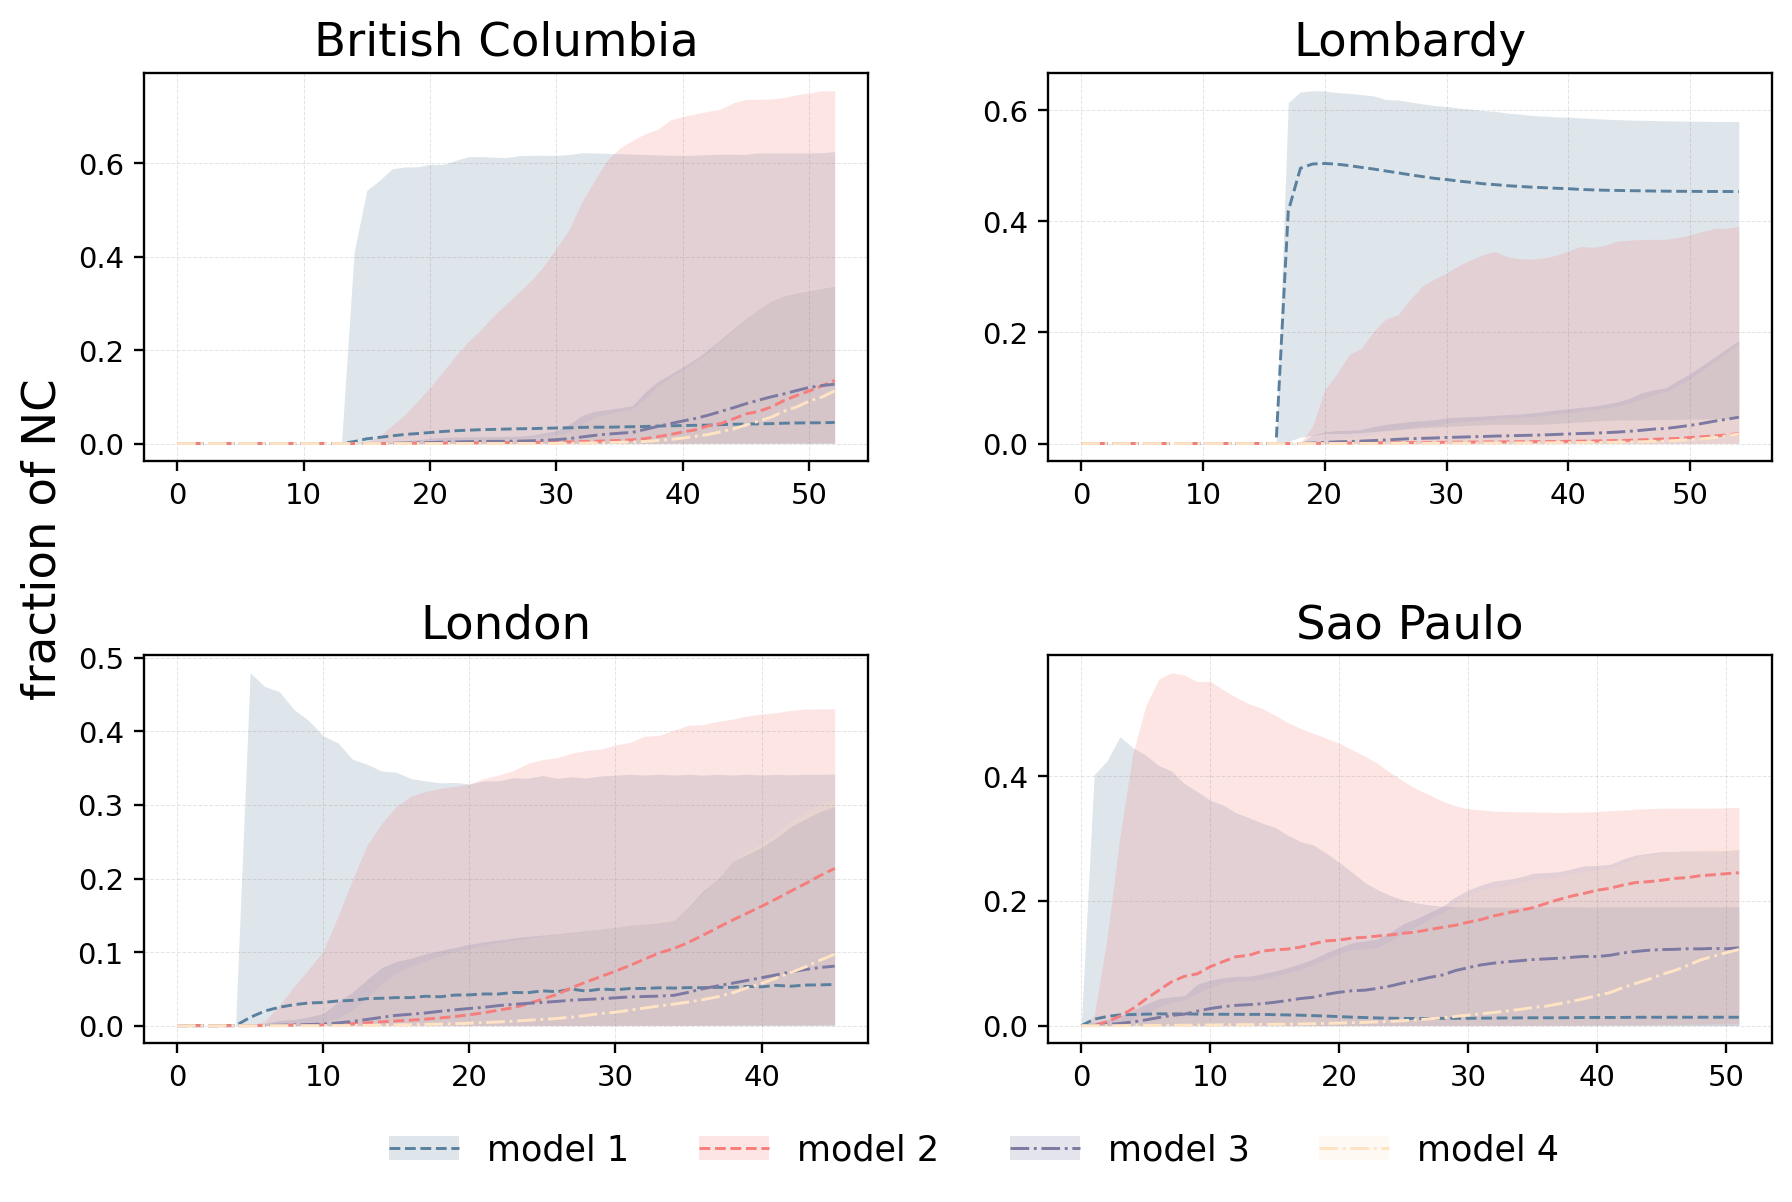

In [15]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=210, figsize=(10, 6))
colors = ['#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4']
models = ['model 1', 'model 2', 'model 3', 'model 4']
linestyles = ['--', '--', '-.', '-.']
i, j = 0, 0
p2=[0,0,0,0]
p1=[0,0,0,0]

for region in ["British Columbia", "Lombardy", "London", "Sao Paulo"]:
    if region == 'British Columbia':
        start_yw, end_yw = '2020-42', '2021-26'
    if region == 'Lombardy':
        start_yw, end_yw = '2020-41', '2021-26'
    if region == 'London':
        start_yw, end_yw = '2020-47', '2021-26'
    if region == 'Sao Paulo':
        start_yw, end_yw = '2021-03', '2021-39'
    total_pop = pd.read_excel(f'../data/regions/{region}/demographic/pop_5years.xlsx')['total'].values.sum()
    df = pd.read_csv("D:/论文/project 1/code_stochastic/data/regions/" + region + "/epidemic/deaths.csv")
    real_date = df.loc[(df["year_week"] >= start_yw) & (df["year_week"] <= end_yw)]["year_week"].values

    path = '../model_output/NC_C_samples/'
    files = os.listdir(path)
    confile1 = [file for file in files if region in file and '_compliant' in file]
    confile2 = [file for file in files if region in file and '_noncompliant' in file]
    c = 0
    for f1, f2 in zip(confile1, confile2):
        cs = np.load(path + f1)["arr_0"]
        ncs = np.load(path + f2)["arr_0"]
        nc_fracs = ncs / (ncs + cs)
        ncs = [nc[8*7:] for nc in ncs]
        ncs_new = []
        for nc in ncs:
            ncs_new.append([nc[ind] for ind in range(len(ncs[0])) if ind % 5 == 0])
        x = [d for d in range(0, len(ncs_new[0]))]
        p1[c], = ax[i, j].plot(x, np.quantile(ncs_new/total_pop, axis=0, q=0.5), 
                            color=colors[c], alpha=1, linewidth=1, linestyle=linestyles[c])
        p2[c] = ax[i, j].fill_between(x, np.quantile(ncs_new/total_pop, axis=0, q=0.05), 
                              np.quantile(ncs_new/total_pop, axis=0, q=0.95), color=colors[c], alpha=0.2, linewidth=0)
        c += 1

    ax[i, j].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.2, axis="both")
    ax[i, j].set_title(region, fontsize=16)

    j += 1
    if j == 2:
        j = 0
        i += 1

ax[0, 0].set_ylabel("fraction of NC", fontsize=16, y=-0.2)
plt.subplots_adjust(wspace=0.25, hspace=0.5)
ax[1, 0].legend([(p1[0], p2[0]), (p1[1], p2[1]), (p1[2],p2[2]), (p1[3], p2[3])], 
                  ["model 1", "model 2", "model 3", "model 4"],bbox_to_anchor=[1, -1.15,1,1], frameon=False, ncol=4, fontsize=12)

plt.savefig(r'.\figures\NC_frac.pdf', bbox_inches="tight")
plt.show()